# EDA, 전처리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\train.csv')

## 데이터 살펴보기

In [3]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [4]:
train.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

결측치: 없음

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

아래는 minuwoo님의 코드공유에서 인용
>ID : 고객의 지정 넘버로 별다른 정보가 없기 때문에 분석에 사용하지 않을 것임  
Age : 고객의 나이, 연속형 변수  
Gender : 성별, 이산형 변수  
Education_Status : 최종학력을 의미한다. 이산형 변수  
Employment_Status : 취업 상태를 의미한다. 이산형 변수  
Working_Week (Yearly) : 주당 일하는 시간으로 해석된다. 연속형변수 or 범주를 잡아 이산형으로 파악 가능  
Industry_Status : 산업분야, 이산형 변수  
Occupation_Status : 직업 분야, 이산형 변수  
Race : 인종, 이산형변수  
Hispanic_Origin : 히스패닉 출신, 이산형 변수  
Martial_Status : 결혼 여부, 이산형 변수  
Household_Status : 가족 구성, 이산형 변수  
Household_Summary : 가족 구성 요약, 이산형 변수  
Citizenship : 시민권, 이산형 변수  
Birth_Country : 국적, 이산형변수  
Birth_Country (Father) : 아버지의 국적, 이산형변수  
Birth_Country (Mother) : 어머니의 국적, 이산형변수  
Tax_Status : 세금 여부, 이산형변수  
Gains : 이득또는 매출로 보인다, 연속형 변수  
Losses : 지출로 보인다, 연속형 변수  
Dividends : 배당금, 연속형 변수  
Income_Status : 소득 상태, 이산형변수  
Income : 소득, 연속형 변수  

범주형 데이터와 선형 데이터 구분해서 리스트로 만들기

In [6]:
categorical_features = [col for col in train.columns if train[col].dtype == 'object']
numerical_features = [col for col in train.columns if train[col].dtype == 'int64']

In [7]:
categorical_features

['ID',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Income_Status']

In [8]:
numerical_features

['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']

## 이상치 제거

In [9]:
train_copy = train.copy()

<Axes: >

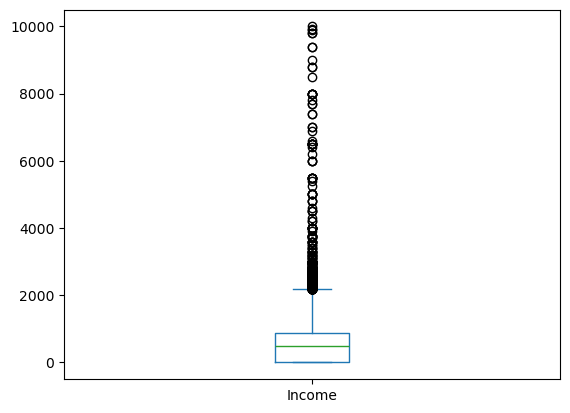

In [10]:
train_copy['Income'].plot(kind='box')

이상치가 상당히 많고, 그 간격이 좁다. 어떤게 진짜 이상치인지 판단할 수 없다. 각 피쳐별로 표준편차가 너무 높게 나오는 범주에서 이상치를 찾아보고 제거하는 식으로 해야겠다.

## 범주형 데이터를 수치 데이터로 인코딩하기

In [11]:
categorical_features[0]

'ID'

### ID

In [12]:
train_copy['ID'].unique()

array(['TRAIN_00000', 'TRAIN_00001', 'TRAIN_00002', ..., 'TRAIN_19997',
       'TRAIN_19998', 'TRAIN_19999'], dtype=object)

ID는 지운다.

In [13]:
train_copy = train_copy.drop('ID', axis=1)

In [14]:
categorical_features[1]

'Gender'

### Gender

In [15]:
train_copy['Gender'].unique()

array(['M', 'F'], dtype=object)

In [16]:
train_copy['Gender'].value_counts()

Gender
F    10472
M     9528
Name: count, dtype: int64

In [17]:
train_copy.groupby(['Gender'])['Income'].mean()

Gender
F    491.735103
M    623.620382
Name: Income, dtype: float64

M과 F의 Income 평균이 유의미한 차이를 보이므로 M은 1, F는 0으로 처리한다

In [18]:
train_copy['Gender'].replace({'M':1,'F':0}, inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3551207921.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['Gender'].replace({'M':1,'F':0}, inplace=True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3551207921.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy['Gend

In [19]:
train_copy.groupby(['Gender'])['Income'].mean()

Gender
0    491.735103
1    623.620382
Name: Income, dtype: float64

In [20]:
categorical_features[2]

'Education_Status'

### Education_Status

In [21]:
train_copy['Education_Status'].unique()

array(['Middle (7-8)', 'Associates degree (Vocational)', 'High graduate',
       'Masters degree', 'Bachelors degree', 'High Freshman',
       'Elementary (1-4)', 'College', 'Children', 'High Sophomore',
       'Associates degree (Academic)', 'High Junior', 'Elementary (5-6)',
       'Doctorate degree', 'Professional degree', 'High Senior',
       'Kindergarten'], dtype=object)

In [22]:
train_copy['Education_Status'].value_counts()

Education_Status
High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: count, dtype: int64

In [23]:
train_copy.groupby(['Education_Status'])['Income'].mean()

Education_Status
Associates degree (Academic)      782.740558
Associates degree (Vocational)    867.269906
Bachelors degree                  699.367076
Children                            0.000000
College                           651.468108
Doctorate degree                  575.528736
Elementary (1-4)                  343.440000
Elementary (5-6)                  325.116719
High Freshman                     366.794595
High Junior                       483.034146
High Senior                       459.942149
High Sophomore                    408.658323
High graduate                     664.652140
Kindergarten                      187.640625
Masters degree                    616.102970
Middle (7-8)                      346.883212
Professional degree               547.036036
Name: Income, dtype: float64

In [24]:
type(train_copy.groupby(['Education_Status'])['Income'].mean())

pandas.core.series.Series

In [25]:
Edu_Inc = train_copy.groupby(['Education_Status'])['Income'].mean()

In [26]:
Edu_Inc.sort_values()

Education_Status
Children                            0.000000
Kindergarten                      187.640625
Elementary (5-6)                  325.116719
Elementary (1-4)                  343.440000
Middle (7-8)                      346.883212
High Freshman                     366.794595
High Sophomore                    408.658323
High Senior                       459.942149
High Junior                       483.034146
Professional degree               547.036036
Doctorate degree                  575.528736
Masters degree                    616.102970
College                           651.468108
High graduate                     664.652140
Bachelors degree                  699.367076
Associates degree (Academic)      782.740558
Associates degree (Vocational)    867.269906
Name: Income, dtype: float64

#### 분기점  
1. Children을 0, Kindergarten을 1, 이렇게 1씩 늘어가며 처리하는데, Elementary (1-4)와 Middle (7-8)는 같은 수로 묶기.
2. Children을 0, 나머지를 1로 어..one-cold? zero-hot? encoding하기. 높은 수가 높은 Income으로 연결되도록 해주고 싶어서.

그런데 Elementary (1-4)가 Elementary (5-6)보다 앞서는게 이상하다. 모든 교육 수준에 대해 표준편차를 봐야겠다.

In [27]:
train_copy.groupby(['Education_Status'])['Income'].std()

Education_Status
Associates degree (Academic)       780.329073
Associates degree (Vocational)     789.597900
Bachelors degree                   862.481403
Children                             0.000000
College                            620.061784
Doctorate degree                  1534.372244
Elementary (1-4)                   517.951327
Elementary (5-6)                   409.012359
High Freshman                      661.753369
High Junior                        566.870296
High Senior                        517.015065
High Sophomore                     519.644798
High graduate                      689.415229
Kindergarten                       292.052092
Masters degree                     995.759554
Middle (7-8)                       677.600863
Professional degree               1113.743499
Name: Income, dtype: float64

Doctorate degree에서 표준편차가 큰 것을 알 수 있다. 박스플롯을 그려보자.

<Axes: >

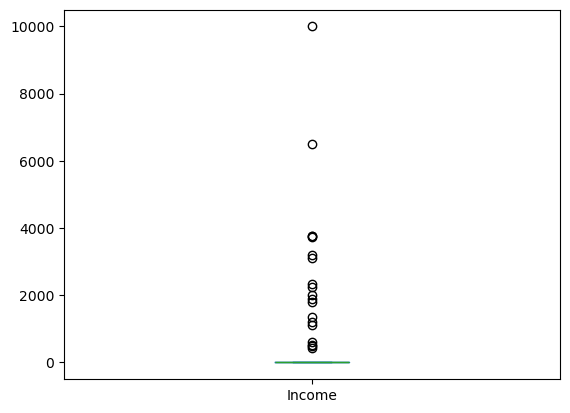

In [28]:
train_copy[train_copy['Education_Status'] == 'Doctorate degree']['Income'].plot(kind = 'box')

이상치가 잘 보인다. 위쪽 2개만 처리해주자.

In [29]:
train_copy[train_copy['Education_Status'] == 'Doctorate degree']['Income'].sort_values()

91          0
12652       0
12228       0
12093       0
11885       0
         ... 
3648     3745
1012     3750
8482     3750
18405    6500
2008     9999
Name: Income, Length: 87, dtype: int64

In [30]:
train_copy.drop([18405], axis=0, inplace=True)
train_copy.drop([2008], axis=0, inplace=True)

<Axes: >

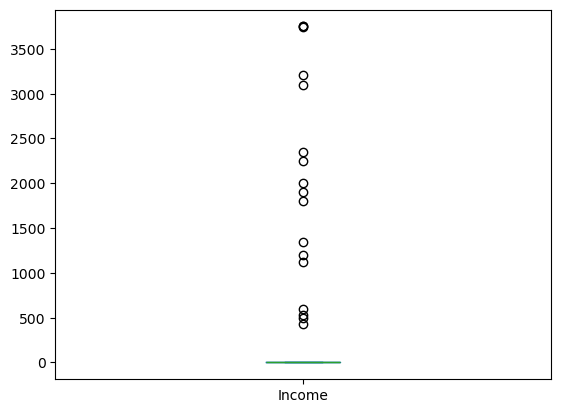

In [31]:
train_copy[train_copy['Education_Status'] == 'Doctorate degree']['Income'].plot(kind = 'box')

In [32]:
train_copy.groupby(['Education_Status'])['Income'].std()

Education_Status
Associates degree (Academic)       780.329073
Associates degree (Vocational)     789.597900
Bachelors degree                   862.481403
Children                             0.000000
College                            620.061784
Doctorate degree                   949.919714
Elementary (1-4)                   517.951327
Elementary (5-6)                   409.012359
High Freshman                      661.753369
High Junior                        566.870296
High Senior                        517.015065
High Sophomore                     519.644798
High graduate                      689.415229
Kindergarten                       292.052092
Masters degree                     995.759554
Middle (7-8)                       677.600863
Professional degree               1113.743499
Name: Income, dtype: float64

Professional degree도 봐보자

<Axes: >

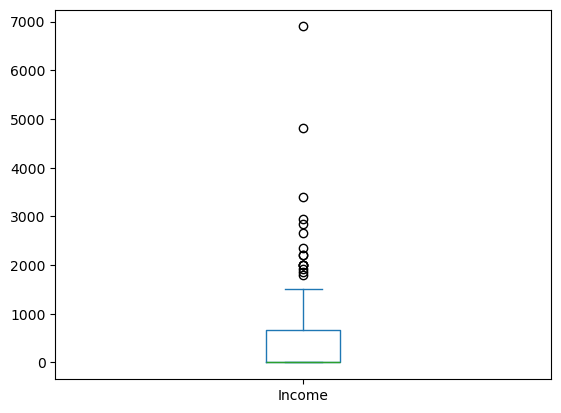

In [33]:
train_copy[train_copy['Education_Status'] == 'Professional degree']['Income'].plot(kind = 'box')

이상치 2개를 제거해주자

In [34]:
train_copy[train_copy['Education_Status'] == 'Professional degree']['Income'].sort_values()

10842       0
11044       0
11008       0
10881       0
10875       0
         ... 
4391     2850
13139    2952
943      3400
6940     4807
16053    6900
Name: Income, Length: 111, dtype: int64

In [35]:
train_copy.drop([16053], axis=0, inplace=True)
train_copy.drop([6940], axis=0, inplace=True)

<Axes: >

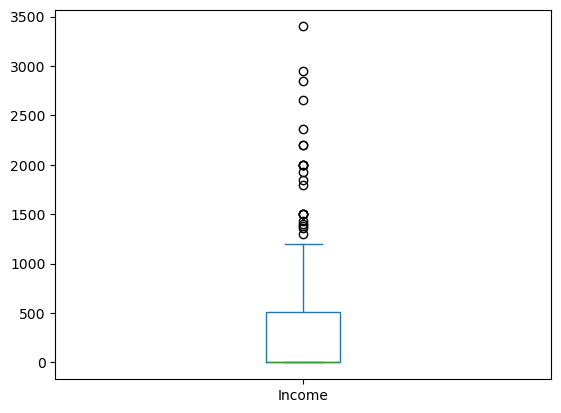

In [36]:
train_copy[train_copy['Education_Status'] == 'Professional degree']['Income'].plot(kind = 'box')

In [37]:
train_copy.groupby(['Education_Status'])['Income'].std()

Education_Status
Associates degree (Academic)      780.329073
Associates degree (Vocational)    789.597900
Bachelors degree                  862.481403
Children                            0.000000
College                           620.061784
Doctorate degree                  949.919714
Elementary (1-4)                  517.951327
Elementary (5-6)                  409.012359
High Freshman                     661.753369
High Junior                       566.870296
High Senior                       517.015065
High Sophomore                    519.644798
High graduate                     689.415229
Kindergarten                      292.052092
Masters degree                    995.759554
Middle (7-8)                      677.600863
Professional degree               843.855340
Name: Income, dtype: float64

위 박스플롯들에서 대부분의 Income이 0에 가까운게 확인된다. 다른 교육 수준에서도 이런가? 가장 표준편차가 적은 Kindergarten을 보자

<Axes: >

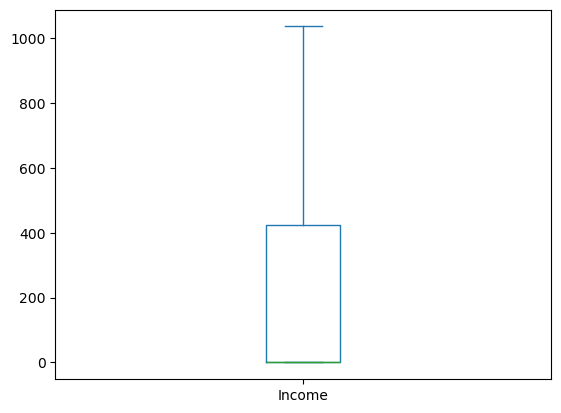

In [38]:
train_copy[train_copy['Education_Status'] == 'Kindergarten']['Income'].plot(kind = 'box')

이상치는 없지만, Income이 0인 사람이 꽤나 있나보다. 모든 교육 수준에 대해 그에 속한 사람 수와 그중 Income이 0인 사람의 비를 살펴보자.

In [39]:
Edu_Inc.keys()

Index(['Associates degree (Academic)', 'Associates degree (Vocational)',
       'Bachelors degree', 'Children', 'College', 'Doctorate degree',
       'Elementary (1-4)', 'Elementary (5-6)', 'High Freshman', 'High Junior',
       'High Senior', 'High Sophomore', 'High graduate', 'Kindergarten',
       'Masters degree', 'Middle (7-8)', 'Professional degree'],
      dtype='object', name='Education_Status')

In [40]:
Edu_levels = list(Edu_Inc.keys())

In [41]:
Edu_levels

['Associates degree (Academic)',
 'Associates degree (Vocational)',
 'Bachelors degree',
 'Children',
 'College',
 'Doctorate degree',
 'Elementary (1-4)',
 'Elementary (5-6)',
 'High Freshman',
 'High Junior',
 'High Senior',
 'High Sophomore',
 'High graduate',
 'Kindergarten',
 'Masters degree',
 'Middle (7-8)',
 'Professional degree']

In [42]:
train_copy[train_copy['Education_Status'] == 'Doctorate degree']['Income'].value_counts(0)

Income
0       68
3750     2
1900     1
2000     1
3205     1
1121     1
2350     1
425      1
525      1
3100     1
1800     1
1200     1
2251     1
500      1
3745     1
1350     1
600      1
Name: count, dtype: int64

In [43]:
train_copy[train_copy['Education_Status'] == 'Doctorate degree']['Income'].value_counts(0)[0]

68

In [44]:
train_copy['Education_Status'].value_counts()

Education_Status
High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                109
Doctorate degree                    85
Kindergarten                        64
Name: count, dtype: int64

In [45]:
train_copy[train_copy['Education_Status'] == 'Children'].count()

Age                       2208
Gender                    2208
Education_Status          2208
Employment_Status         2208
Working_Week (Yearly)     2208
Industry_Status           2208
Occupation_Status         2208
Race                      2208
Hispanic_Origin           2208
Martial_Status            2208
Household_Status          2208
Household_Summary         2208
Citizenship               2208
Birth_Country             2208
Birth_Country (Father)    2208
Birth_Country (Mother)    2208
Tax_Status                2208
Gains                     2208
Losses                    2208
Dividends                 2208
Income_Status             2208
Income                    2208
dtype: int64

In [46]:
train_copy[train_copy['Education_Status'] == 'Children'].count()['Income']

2208

In [47]:
for Edu_level in Edu_levels:
    print(Edu_level, ": ", 
          round((train_copy[train_copy['Education_Status'] == Edu_level]['Income'].value_counts(0)[0] 
           / train_copy[train_copy['Education_Status'] == Edu_level].count()['Income']) * 100, 2), '%')

Associates degree (Academic) :  32.68 %
Associates degree (Vocational) :  27.13 %
Bachelors degree :  45.4 %
Children :  100.0 %
College :  30.31 %
Doctorate degree :  80.0 %
Elementary (1-4) :  54.67 %
Elementary (5-6) :  53.94 %
High Freshman :  50.99 %
High Junior :  32.44 %
High Senior :  35.12 %
High Sophomore :  42.43 %
High graduate :  30.84 %
Kindergarten :  67.19 %
Masters degree :  61.58 %
Middle (7-8) :  58.21 %
Professional degree :  74.31 %


생각보다 소득이 없는 사람이 많다...

이 점은 새로운 피쳐로서 추가해줘야겠다.  
{Children: 0,  
[Doctorate degree, Professional degree, Kindergarten]: 1,  
[Masters degree, Middle (7-8), Elementary (1-4), Elementary (5-6), High Freshman]: 2,  
[Bachelors degree, High Sophomore, High Senior]: 3,  
[Associates degree (Academic), High Junior, High graduate, College, Associates degree (Vocational)]: 4}  
로 매핑하자.

피처명은 No_Income_Level

In [48]:
train_copy['No_Income_Level'] = train_copy['Education_Status']

In [49]:
train_copy['No_Income_Level'].replace({'Children': 0, 
                                       'Doctorate degree': 1, 
                                       'Professional degree': 1, 
                                       'Kindergarten' : 1, 
                                       'Masters degree': 2, 
                                       'Middle (7-8)': 2, 
                                       'Elementary (1-4)': 2, 
                                       'Elementary (5-6)': 2, 
                                       'High Freshman' : 2, 
                                       'Bachelors degree': 3, 
                                       'High Sophomore': 3, 
                                       'High Senior': 3, 
                                       'Associates degree (Academic)': 4, 
                                       'High Junior': 4, 
                                       'High graduate': 4, 
                                       'College': 4, 
                                       'Associates degree (Vocational)' : 4}, 
                                      inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2284508190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['No_Income_Level'].replace({'Children': 0,
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2284508190.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy['No_Incom

In [50]:
train_copy['No_Income_Level'].unique()

array([2, 4, 3, 0, 1], dtype=int64)

새 피쳐 추가 완료. 이제 본래 문제로 돌아와서 Education_Status를 어떻게 처리할 것인가?  

2번(Children을 0, 나머지 1)으로 하자.

In [51]:
train_copy['Education_Status'].replace({'Children': 0, 
                                       'Doctorate degree': 1, 
                                       'Professional degree': 1, 
                                       'Kindergarten' : 1, 
                                       'Masters degree': 1, 
                                       'Middle (7-8)': 1, 
                                       'Elementary (1-4)': 1, 
                                       'Elementary (5-6)': 1, 
                                       'High Freshman' : 1, 
                                       'Bachelors degree': 1, 
                                       'High Sophomore': 1, 
                                       'High Senior': 1, 
                                       'Associates degree (Academic)': 1, 
                                       'High Junior': 1, 
                                       'High graduate': 1, 
                                       'College': 1, 
                                       'Associates degree (Vocational)' : 1}, 
                                       inplace = True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3978701326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['Education_Status'].replace({'Children': 0,
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3978701326.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy['Educati

In [52]:
train_copy['Education_Status'].unique()

array([1, 0], dtype=int64)

In [53]:
train_copy['Education_Status'].value_counts()

Education_Status
1    17788
0     2208
Name: count, dtype: int64

In [54]:
categorical_features[3]

'Employment_Status'

### Employment_Status

In [55]:
train_copy['Employment_Status'].unique()

array(['Full-Time', 'Children or Armed Forces', 'Not Working',
       'Seeking Full-Time', 'Choice Part-Time',
       'Part-Time (Usually Part-Time)', 'Part-Time (Usually Full-Time)',
       'Seeking Part-Time'], dtype=object)

In [56]:
train_copy['Employment_Status'].value_counts()

Employment_Status
Children or Armed Forces         11141
Full-Time                         6586
Not Working                       1221
Choice Part-Time                   593
Part-Time (Usually Part-Time)      157
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: count, dtype: int64

In [57]:
train_copy.groupby(['Employment_Status'])['Income'].mean()

Employment_Status
Children or Armed Forces         487.373306
Choice Part-Time                 792.866779
Full-Time                        745.120255
Not Working                        0.000000
Part-Time (Usually Full-Time)    757.970000
Part-Time (Usually Part-Time)    852.878981
Seeking Full-Time                146.595041
Seeking Part-Time                367.584416
Name: Income, dtype: float64

In [58]:
train_copy.groupby(['Employment_Status'])['Income'].std()

Employment_Status
Children or Armed Forces         687.605306
Choice Part-Time                 718.380981
Full-Time                        688.146975
Not Working                        0.000000
Part-Time (Usually Full-Time)    629.655838
Part-Time (Usually Part-Time)    896.507164
Seeking Full-Time                655.145284
Seeking Part-Time                423.403794
Name: Income, dtype: float64

not working: 0, Seeking Full-Time: 1, Seeking Part-Time: 2, Children or Armed Forces: 3, 나머지: 4로 하자

In [59]:
train_copy['Employment_Status'].replace({'Full-Time': 1, 
                                         'Children or Armed Forces': 3, 
                                         'Not Working': 0, 
                                         'Seeking Full-Time': 4, 
                                         'Choice Part-Time': 4, 
                                         'Part-Time (Usually Part-Time)': 4, 
                                         'Part-Time (Usually Full-Time)': 4, 
                                         'Seeking Part-Time': 2}, 
                                         inplace = True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3457892382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['Employment_Status'].replace({'Full-Time': 1,
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3457892382.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy['Emplo

In [60]:
train_copy['Employment_Status'].unique()

array([1, 3, 0, 4, 2], dtype=int64)

In [61]:
train_copy['Employment_Status'].value_counts()

Employment_Status
3    11141
1     6586
0     1221
4      971
2       77
Name: count, dtype: int64

In [62]:
categorical_features[4]

'Industry_Status'

### Industry_Status

In [63]:
train_copy['Industry_Status'].unique()

array(['Social Services', 'Entertainment', 'Manufacturing (Non-durable)',
       'Retail', 'Not in universe or children', 'Construction',
       'Hospitals', 'Manufacturing (Durable)', 'Public Administration',
       'Education', 'Finance Insurance & Real Estate', 'Transportation',
       'Medical (except Hospitals)', 'Wholesale',
       'Other professional services',
       'Personal Services (except Private Household)',
       'Business & Repair', 'Private Household Services', 'Mining',
       'Agriculture', 'Utilities & Sanitary', 'Communications',
       'Forestry & Fisheries', 'Armed Forces'], dtype=object)

In [64]:
train_copy['Industry_Status'].value_counts()

Industry_Status
Not in universe or children                     4688
Retail                                          3149
Manufacturing (Durable)                         1575
Manufacturing (Non-durable)                     1223
Education                                       1041
Business & Repair                                847
Medical (except Hospitals)                       838
Construction                                     832
Hospitals                                        819
Finance Insurance & Real Estate                  727
Transportation                                   693
Public Administration                            641
Other professional services                      475
Wholesale                                        450
Personal Services (except Private Household)     429
Social Services                                  367
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary          

In [65]:
train_copy.groupby(['Industry_Status'])['Income'].mean()

Industry_Status
Agriculture                                      434.630597
Armed Forces                                       0.000000
Business & Repair                                646.846517
Communications                                   952.835897
Construction                                     887.155048
Education                                        616.393852
Entertainment                                    703.643885
Finance Insurance & Real Estate                  625.617607
Forestry & Fisheries                             592.038462
Hospitals                                       1028.439560
Manufacturing (Durable)                          907.412063
Manufacturing (Non-durable)                      739.130826
Medical (except Hospitals)                       718.083532
Mining                                           975.700935
Not in universe or children                        0.000000
Other professional services                      715.778947
Personal Services (excep

In [66]:
train_copy.groupby(['Industry_Status'])['Income'].std()

Industry_Status
Agriculture                                     688.821902
Armed Forces                                           NaN
Business & Repair                               718.307668
Communications                                  759.037449
Construction                                    768.284058
Education                                       756.302143
Entertainment                                   908.047458
Finance Insurance & Real Estate                 678.940067
Forestry & Fisheries                            637.601536
Hospitals                                       818.605148
Manufacturing (Durable)                         717.950536
Manufacturing (Non-durable)                     659.214074
Medical (except Hospitals)                      691.000910
Mining                                          709.899252
Not in universe or children                       0.000000
Other professional services                     808.161561
Personal Services (except Private Househ

Armed Forces는 샘플이 하나 뿐이므로 제거하고, Not in universe or children는 샘플이 가장 많은데 모두 Income이 0이라 이것만 0, 나머진 1로 매핑하자

In [67]:
train_copy[train_copy['Industry_Status'] == 'Armed Forces']

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income,No_Income_Level
10342,31,0,1,4,20,Armed Forces,Armed Forces,White,Puerto Rican,Married,...,US,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0,4


In [68]:
train_copy.drop([10342], axis=0, inplace=True)

In [69]:
Industry_list = list(train_copy['Industry_Status'].unique())

In [70]:
# 한 value만 0으로, 나머지는 1로 만드는 함수 정의
def one_cold_encoder_train(value_list, column, item):
    for value in value_list:
        if value == item:
            train_copy[column].replace({value: 0}, inplace = True)
        else:
            train_copy[column].replace({value: 1}, inplace = True)

def one_cold_encoder_test(value_list, column, item):
    for value in value_list:
        if value == item:
            test_copy[column].replace({value: 0}, inplace = True)
        else:
            test_copy[column].replace({value: 1}, inplace = True)

In [71]:
#여기선 수작업으로 이미 했으니 남겨둔다.
for industry in Industry_list:
    if industry == 'Not in universe or children':
        train_copy['Industry_Status'].replace({industry: 0}, inplace = True)
    else:
        train_copy['Industry_Status'].replace({industry: 1}, inplace = True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1739816916.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['Industry_Status'].replace({industry: 1}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1739816916.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train

In [72]:
train_copy['Industry_Status'].unique()

array([1, 0], dtype=int64)

In [73]:
train_copy['Industry_Status'].value_counts()

Industry_Status
1    15307
0     4688
Name: count, dtype: int64

In [74]:
categorical_features[5]

'Occupation_Status'

### Occupation_Status

In [75]:
train_copy['Occupation_Status'].unique()

array(['Services', 'Admin Support (include Clerical)',
       'Technicians & Support', 'Sales', 'Unknown',
       'Machine Operators & Inspectors', 'Craft & Repair',
       'Protective Services', 'Management', 'Professional',
       'Transportation', 'Handlers/Cleaners',
       'Private Household Services', 'Farming & Forestry & Fishing'],
      dtype=object)

In [76]:
train_copy['Occupation_Status'].value_counts()

Occupation_Status
Unknown                             4688
Admin Support (include Clerical)    2709
Services                            2313
Craft & Repair                      1869
Sales                               1692
Professional                        1484
Machine Operators & Inspectors      1383
Management                          1111
Handlers/Cleaners                    837
Transportation                       690
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  260
Private Household Services           105
Name: count, dtype: int64

In [77]:
train_copy.groupby(['Occupation_Status'])['Income'].mean()

Occupation_Status
Admin Support (include Clerical)     750.374677
Craft & Repair                       986.415730
Farming & Forestry & Fishing         477.922297
Handlers/Cleaners                    655.152927
Machine Operators & Inspectors       802.055676
Management                           619.179118
Private Household Services           420.857143
Professional                         868.083558
Protective Services                  823.511538
Sales                                488.010638
Services                             512.062257
Technicians & Support               1002.417563
Transportation                       846.002899
Unknown                                0.000000
Name: Income, dtype: float64

In [78]:
train_copy.groupby(['Occupation_Status'])['Income'].std()

Occupation_Status
Admin Support (include Clerical)    684.806147
Craft & Repair                      731.738278
Farming & Forestry & Fishing        692.401944
Handlers/Cleaners                   608.930396
Machine Operators & Inspectors      655.225580
Management                          730.239557
Private Household Services          311.273669
Professional                        942.370903
Protective Services                 707.339092
Sales                               491.320022
Services                            618.155201
Technicians & Support               809.819396
Transportation                      656.516045
Unknown                               0.000000
Name: Income, dtype: float64

Unknown을 0, 나머진 1로 하자

In [79]:
Occupation_list = list(train_copy['Occupation_Status'].unique())

In [80]:
one_cold_encoder_train(Occupation_list, 'Occupation_Status', 'Unknown')

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy[column].replace({value: 1}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy[column].

In [81]:
train_copy['Occupation_Status'].value_counts()

Occupation_Status
1    15307
0     4688
Name: count, dtype: int64

In [82]:
categorical_features[6]

'Race'

### Race

In [83]:
train_copy['Race'].unique()

array(['White', 'Black', 'Native American/Aleut/Eskimo', 'Asian/Pacific',
       'Other'], dtype=object)

In [84]:
train_copy['Race'].value_counts()

Race
White                           16840
Black                            2122
Asian/Pacific                     511
Other                             296
Native American/Aleut/Eskimo      226
Name: count, dtype: int64

In [85]:
train_copy.groupby(['Race'])['Income'].mean()

Race
Asian/Pacific                   524.512720
Black                           512.730914
Native American/Aleut/Eskimo    533.079646
Other                           411.206081
White                           562.046615
Name: Income, dtype: float64

In [86]:
train_copy.groupby(['Race'])['Income'].std()

Race
Asian/Pacific                   652.558106
Black                           650.000693
Native American/Aleut/Eskimo    814.033176
Other                           798.781921
White                           697.740007
Name: Income, dtype: float64

Other만 0으로

In [87]:
Race_list = list(train_copy['Race'].unique())

In [88]:
one_cold_encoder_train(Race_list, 'Race', 'Other')

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy[column].replace({value: 1}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy[column].

In [89]:
categorical_features[7]

'Hispanic_Origin'

### Hispanic_Origin

자꾸 카테고리, 그 수, 소득 평균, 소득 표준편차 보는데 이거 함수로 만들자

In [90]:
def basic_info(column):
    print(train_copy[column].unique())
    print(train_copy[column].value_counts())
    print("\n Mean: \n")
    print(train_copy.groupby([column])['Income'].mean())
    print("\n Std: \n")
    print(train_copy.groupby([column])['Income'].std())

In [91]:
basic_info('Hispanic_Origin')

[' All other' ' Cuban' ' Mexican (Mexicano)' ' Central or South American'
 ' Puerto Rican' ' Mexican-American' ' Other Spanish' ' Do not know'
 ' Chicano' ' NA']
Hispanic_Origin
All other                    17765
Mexican-American               654
Mexican (Mexicano)             624
Central or South American      325
Puerto Rican                   242
Other Spanish                  201
Cuban                           76
NA                              59
Chicano                         27
Do not know                     22
Name: count, dtype: int64

 Mean: 

Hispanic_Origin
All other                    573.535435
Central or South American    356.089231
Chicano                      644.925926
Cuban                        370.802632
Do not know                  268.090909
Mexican (Mexicano)           395.666667
Mexican-American             420.946483
NA                           247.881356
Other Spanish                381.213930
Puerto Rican                 386.681818
Name: Income, dtype:

NA, Do not know: 0

Other Spanish, 
Puerto Rican, 
Cuban, 
Mexican (Mexicano), 
Central or South American, 
Mexican-American: 1

All other: 2

Chicano: 3

으로 하자

In [92]:
Hispanic_Origin_list = list(train_copy['Hispanic_Origin'].unique())

In [93]:
Hispanic_Origin_list

[' All other',
 ' Cuban',
 ' Mexican (Mexicano)',
 ' Central or South American',
 ' Puerto Rican',
 ' Mexican-American',
 ' Other Spanish',
 ' Do not know',
 ' Chicano',
 ' NA']

In [94]:
# value별로 지정된 수로 바꾸는 함수
def many_encoder_train(column, diction):
    for value in diction.keys():
        code = diction[value]
        train_copy[column].replace({value: code}, inplace = True)

def many_encoder_test(column, diction):
    for value in diction.keys():
        code = diction[value]
        test_copy[column].replace({value: code}, inplace = True)

In [95]:
Hispanic_Origin_diction = {' All other': 2, 
                           ' Cuban': 1, 
                           ' Mexican (Mexicano)': 1, 
                           ' Central or South American': 1, 
                           ' Puerto Rican': 1, 
                           ' Mexican-American': 1, 
                           ' Other Spanish': 1, 
                           ' Do not know': 0,
                           ' Chicano': 3, 
                           ' NA': 0}

In [96]:
many_encoder_train('Hispanic_Origin', Hispanic_Origin_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy[column].rep

In [97]:
train_copy['Hispanic_Origin'].unique()

array([2, 1, 0, 3], dtype=int64)

In [98]:
categorical_features[8]

'Martial_Status'

### Martial_Status

In [99]:
basic_info('Martial_Status')

['Married' 'Separated' 'Divorced' 'Widowed' 'Single'
 'Married (Spouse Absent)' 'Married (Armed Force Spouse)']
Martial_Status
Married                         9550
Single                          7379
Divorced                        1633
Widowed                          756
Separated                        436
Married (Spouse Absent)          171
Married (Armed Force Spouse)      70
Name: count, dtype: int64

 Mean: 

Martial_Status
Divorced                        692.336803
Married                         685.582513
Married (Armed Force Spouse)    920.000000
Married (Spouse Absent)         528.070175
Separated                       632.185780
Single                          367.174278
Widowed                         324.719577
Name: Income, dtype: float64

 Std: 

Martial_Status
Divorced                         672.643437
Married                          751.178246
Married (Armed Force Spouse)    1545.847144
Married (Spouse Absent)          616.009698
Separated                        

Married (Armed Force Spouse) 항목의 표준편차가 크다. 박스플롯을 그려보자

<Axes: >

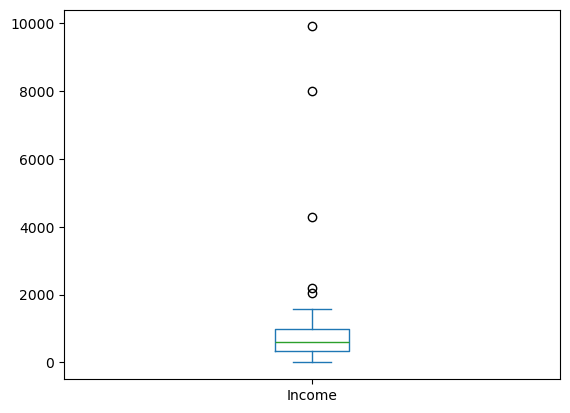

In [100]:
train_copy[train_copy['Martial_Status'] == 'Married (Armed Force Spouse)']['Income'].plot(kind = 'box')

위쪽 이상치 3개만 삭제하자

In [101]:
train_copy[train_copy['Martial_Status'] == 'Married (Armed Force Spouse)']['Income'].sort_values()

13468       0
6619        0
6046        0
11005       0
9782        0
         ... 
19943    2050
15860    2200
5785     4300
10948    8000
9869     9900
Name: Income, Length: 70, dtype: int64

In [102]:
train_copy.drop([10948], axis=0, inplace=True)
train_copy.drop([9869], axis=0, inplace=True)
train_copy.drop([5785], axis=0, inplace=True)

<Axes: >

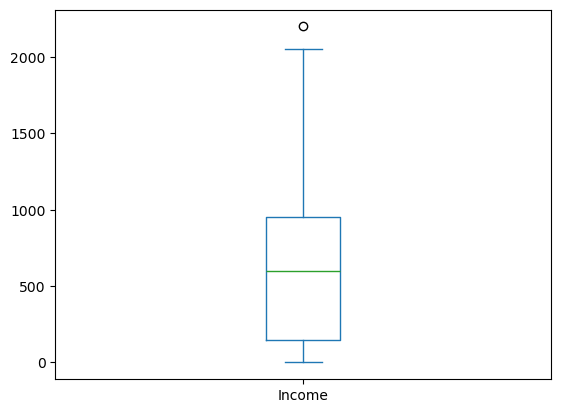

In [103]:
train_copy[train_copy['Martial_Status'] == 'Married (Armed Force Spouse)']['Income'].plot(kind = 'box')

In [104]:
basic_info('Martial_Status')

['Married' 'Separated' 'Divorced' 'Widowed' 'Single'
 'Married (Spouse Absent)' 'Married (Armed Force Spouse)']
Martial_Status
Married                         9550
Single                          7379
Divorced                        1633
Widowed                          756
Separated                        436
Married (Spouse Absent)          171
Married (Armed Force Spouse)      67
Name: count, dtype: int64

 Mean: 

Martial_Status
Divorced                        692.336803
Married                         685.582513
Married (Armed Force Spouse)    629.850746
Married (Spouse Absent)         528.070175
Separated                       632.185780
Single                          367.174278
Widowed                         324.719577
Name: Income, dtype: float64

 Std: 

Martial_Status
Divorced                        672.643437
Married                         751.178246
Married (Armed Force Spouse)    508.320057
Married (Spouse Absent)         616.009698
Separated                       844.8

Single, Widowed: 0  
Divorced, Married, Married (Armed Force Spouse), Married (Spouse Absent), Separated: 1  
로 하자

In [105]:
Martial_Status_list = list(train_copy['Martial_Status'].unique())

In [106]:
Martial_Status_list

['Married',
 'Separated',
 'Divorced',
 'Widowed',
 'Single',
 'Married (Spouse Absent)',
 'Married (Armed Force Spouse)']

In [107]:
Martial_Status_diction = {'Single': 0, 
                           'Widowed': 0, 
                           'Divorced': 1, 
                           'Married': 1, 
                           'Married (Armed Force Spouse)': 1, 
                           'Married (Spouse Absent)': 1, 
                           'Separated': 1}

In [108]:
many_encoder_train('Martial_Status', Martial_Status_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy[column].rep

In [109]:
train_copy['Martial_Status'].unique()

array([1, 0], dtype=int64)

In [110]:
categorical_features[9]

'Household_Status'

### Household_Status

In [111]:
basic_info('Household_Status')

['Householder' 'Nonfamily householder'
 'Child 18+ never marr Not in a subfamily' 'Spouse of householder'
 'Other Relative 18+ ever married Responsible Person of subfamily'
 'Child <18 never marr not in subfamily'
 'Other Relative <18 never married child of subfamily Responsible Person'
 'Child 18+ ever married Responsible Person of subfamily'
 'Secondary individual' 'Grandchild 18+ never marr not in subfamily'
 'Other Rel 18+ ever marr not in subfamily'
 'Responsible Person of unrelated subfamily'
 'Grandchild <18 never married child of subfamily Responsible Person'
 'Child 18+ ever marr Not in a subfamily'
 'Other Rel 18+ never marr not in subfamily'
 'Child 18+ never married Responsible Person of subfamily'
 'Other Rel <18 never marr not in subfamily'
 'Child under 18 of Responsible Person of unrelated subfamily'
 'Grandchild <18 never marr not in subfamily' 'In group quarters'
 'Other Relative 18+ spouse of subfamily Responsible Person'
 'Other Relative 18+ never married Responsibl

너무 복잡하다. 다행이 이 정보를 요약한 피쳐가 달리 있다. 이걸로 보자.

In [112]:
categorical_features[10]

'Household_Summary'

### Household_Summary

In [113]:
basic_info('Household_Summary')

['Householder' 'Child 18 or older' 'Spouse of householder'
 'Other relative of householder' 'Child under 18 never married'
 'Nonrelative of householder' 'Group Quarters- Secondary individual'
 'Child under 18 ever married']
Household_Summary
Householder                             8550
Spouse of householder                   4788
Child under 18 never married            2679
Child 18 or older                       2192
Nonrelative of householder               974
Other relative of householder            781
Group Quarters- Secondary individual      24
Child under 18 ever married                4
Name: count, dtype: int64

 Mean: 

Household_Summary
Child 18 or older                       518.402828
Child under 18 ever married             225.000000
Child under 18 never married             64.220605
Group Quarters- Secondary individual    409.625000
Householder                             697.048070
Nonrelative of householder              539.687885
Other relative of householder         

Child under 18 ever married 샘플이 4개밖에 없지만 표준편차가 적으므로 채용하겠다.

Child under 18 never married: 0  
Child under 18 ever married: 1  
Other relative of householder, Group Quarters- Secondary individual: 2  
Child 18 or older, Nonrelative of householder: 3  
Spouse of householder: 4  
Householder: 5  

로 하자

In [114]:
Household_Summary_list = train_copy['Household_Summary'].unique()

In [115]:
Household_Summary_list

array(['Householder', 'Child 18 or older', 'Spouse of householder',
       'Other relative of householder', 'Child under 18 never married',
       'Nonrelative of householder',
       'Group Quarters- Secondary individual',
       'Child under 18 ever married'], dtype=object)

In [116]:
Household_Summary_diction = {'Householder': 5, 
                          'Child 18 or older': 3, 
                          'Spouse of householder': 4, 
                          'Other relative of householder': 2, 
                          'Child under 18 never married': 0, 
                          'Nonrelative of householder': 3, 
                          'Group Quarters- Secondary individual': 2, 
                          'Child under 18 ever married': 1}

In [117]:
many_encoder_train('Household_Summary', Household_Summary_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy[column].rep

In [118]:
train_copy['Household_Summary'].value_counts()

Household_Summary
5    8550
4    4788
3    3166
0    2679
2     805
1       4
Name: count, dtype: int64

마지막으로 Household_Status 열은 삭제하자

In [119]:
train_copy = train_copy.drop('Household_Status', axis=1)

In [120]:
categorical_features[11]

'Citizenship'

### Citizenship

In [121]:
basic_info('Citizenship')

['Native' 'Foreign-born (Non-US Citizen)'
 'Native (Born in Puerto Rico or US Outlying)'
 'Foreign-born (Naturalized US Citizen)' 'Native (Born Abroad)']
Citizenship
Native                                         17818
Foreign-born (Non-US Citizen)                   1258
Foreign-born (Naturalized US Citizen)            587
Native (Born Abroad)                             197
Native (Born in Puerto Rico or US Outlying)      132
Name: count, dtype: int64

 Mean: 

Citizenship
Foreign-born (Naturalized US Citizen)          654.005111
Foreign-born (Non-US Citizen)                  436.466614
Native                                         558.429229
Native (Born Abroad)                           542.421320
Native (Born in Puerto Rico or US Outlying)    386.166667
Name: Income, dtype: float64

 Std: 

Citizenship
Foreign-born (Naturalized US Citizen)          961.866063
Foreign-born (Non-US Citizen)                  595.606167
Native                                         682.187456
Native 

Native (Born in Puerto Rico or US Outlying): 0  
Foreign-born (Non-US Citizen): 1  
Native (Born Abroad), Native: 2  
Foreign-born (Naturalized US Citizen): 3

으로 하자

In [122]:
Citizenship_list = train_copy['Citizenship'].unique()

In [123]:
Citizenship_list

array(['Native', 'Foreign-born (Non-US Citizen)',
       'Native (Born in Puerto Rico or US Outlying)',
       'Foreign-born (Naturalized US Citizen)', 'Native (Born Abroad)'],
      dtype=object)

In [124]:
Citizenship_diction = {'Native': 2, 
                       'Foreign-born (Non-US Citizen)': 1, 
                       'Native (Born in Puerto Rico or US Outlying)': 0, 
                       'Foreign-born (Naturalized US Citizen)': 3, 
                       'Native (Born Abroad)': 2}

In [125]:
many_encoder_train('Citizenship', Citizenship_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy[column].rep

In [126]:
train_copy['Citizenship'].value_counts()

Citizenship
2    18015
1     1258
3      587
0      132
Name: count, dtype: int64

In [127]:
categorical_features[12]

'Birth_Country'

### Birth_Country, Birth_Country (Father), Birth_Country (Mother)

In [128]:
basic_info('Birth_Country')

['US' 'Cuba' 'Portugal' 'Mexico' 'Puerto-Rico' 'Germany' 'Japan'
 'Columbia' 'Philippines' 'Unknown' 'Italy' 'Trinadad&Tobago'
 'South Korea' 'Iran' 'England' 'India' 'Vietnam' 'France' 'Scotland'
 'Ecuador' 'China' 'Outlying-U S (Guam USVI etc)' 'Nicaragua' 'Peru'
 'Canada' 'Jamaica' 'Dominican-Republic' 'Poland' 'Hong Kong' 'Thailand'
 'Cambodia' 'Guatemala' 'Laos' 'Yugoslavia' 'Haiti' 'Ireland'
 'El-Salvador' 'Panama' 'Honduras' 'Greece' 'Hungary' 'Taiwan'
 'Holand-Netherlands']
Birth_Country
US                              17818
Mexico                            540
Unknown                           329
Puerto-Rico                       117
Philippines                       112
Germany                            90
Canada                             75
El-Salvador                        68
Cuba                               58
India                              55
Dominican-Republic                 49
England                            47
Poland                             45
Jamai

복잡하다. 부 국적, 모 국적이랑 같이 보자

In [129]:
categorical_features[13]

'Birth_Country (Father)'

In [130]:
categorical_features[14]

'Birth_Country (Mother)'

In [131]:
basic_info('Birth_Country (Father)')

['US' 'Cuba' 'Portugal' 'Mexico' 'Unknown' 'Puerto-Rico' 'Germany' 'Japan'
 'Poland' 'Columbia' 'Philippines' 'Italy' 'Trinadad&Tobago' 'England'
 'South Korea' 'Iran' 'France' 'India' 'China' 'Dominican-Republic'
 'Scotland' 'Ecuador' 'Nicaragua' 'Peru' 'Cambodia' 'Canada' 'Jamaica'
 'Vietnam' 'Hong Kong' 'Thailand' 'Haiti' 'Guatemala' 'Laos' 'Yugoslavia'
 'Ireland' 'El-Salvador' 'Panama' 'Honduras' 'Greece'
 'Outlying-U S (Guam USVI etc)' 'Hungary' 'Taiwan' 'Holand-Netherlands']
Birth_Country (Father)
US                              16557
Mexico                            845
Unknown                           580
Puerto-Rico                       205
Italy                             197
Canada                            128
Philippines                       121
Poland                            110
Dominican-Republic                 99
Germany                            92
El-Salvador                        83
Cuba                               78
England                            

In [132]:
basic_info('Birth_Country (Mother)')

['US' 'Cuba' 'Portugal' 'Mexico' 'Puerto-Rico' 'Germany' 'Japan'
 'Columbia' 'Philippines' 'Unknown' 'Italy' 'Trinadad&Tobago' 'England'
 'South Korea' 'Iran' 'India' 'Vietnam' 'Dominican-Republic' 'Scotland'
 'Ecuador' 'China' 'France' 'Canada' 'Nicaragua' 'Peru' 'Cambodia'
 'Poland' 'Jamaica' 'Hong Kong' 'Thailand' 'Haiti' 'Ireland' 'Guatemala'
 'Laos' 'Yugoslavia' 'Greece' 'Outlying-U S (Guam USVI etc)' 'El-Salvador'
 'Panama' 'Honduras' 'Hungary' 'Holand-Netherlands' 'Taiwan']
Birth_Country (Mother)
US                              16588
Mexico                            849
Unknown                           516
Puerto-Rico                       193
Canada                            159
Italy                             152
Philippines                       128
Germany                           117
Poland                            104
El-Salvador                        99
England                            88
Dominican-Republic                 75
Cuba                               

전부 삭제하자. 평균 수입 순서대로 0~n으로 매핑하려 해도 표준편차가 유독 큰 항목이 있고, 수입 0이다가 높아지는 나라도 있고, 무엇보다 가지수가 너무 많다.

In [133]:
train_copy = train_copy.drop('Birth_Country', axis=1)

In [134]:
train_copy = train_copy.drop('Birth_Country (Father)', axis=1)

In [135]:
train_copy = train_copy.drop('Birth_Country (Mother)', axis=1)

In [136]:
categorical_features[15]

'Tax_Status'

### Tax_Status

In [137]:
basic_info('Tax_Status')

['Nonfiler' 'Single' 'Married Filling Jointly both under 65 (MFJ)'
 'Head of Household (HOH)'
 'Married Filling Jointly one over 65 & one under 65 (MFJ)'
 'Married Filling Jointly both over 65 (MFJ)']
Tax_Status
Married Filling Jointly both under 65 (MFJ)                 8581
Single                                                      5546
Nonfiler                                                    3874
Head of Household (HOH)                                     1217
Married Filling Jointly both over 65 (MFJ)                   469
Married Filling Jointly one over 65 & one under 65 (MFJ)     305
Name: count, dtype: int64

 Mean: 

Tax_Status
Head of Household (HOH)                                     676.317995
Married Filling Jointly both over 65 (MFJ)                  203.144989
Married Filling Jointly both under 65 (MFJ)                 738.369188
Married Filling Jointly one over 65 & one under 65 (MFJ)    474.095082
Nonfiler                                                     60.947

Married Filling Jointly one over 65 & one under 65 (MFJ) 항목의 표준편차가 크니 박스플롯을 보자

<Axes: >

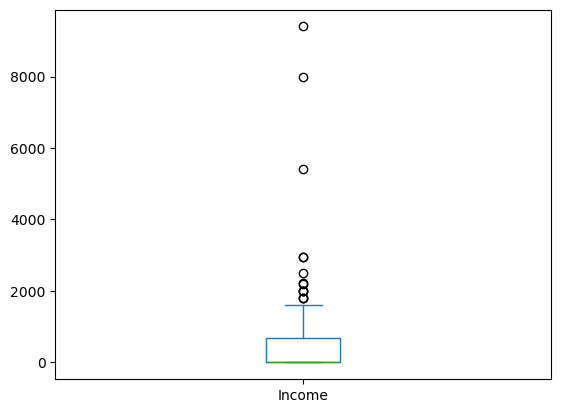

In [138]:
train_copy[train_copy['Tax_Status'] == 'Married Filling Jointly one over 65 & one under 65 (MFJ)']['Income'].plot(kind = 'box')

이상치 3개 제거해주자.

In [139]:
train_copy[train_copy['Tax_Status'] == 'Married Filling Jointly one over 65 & one under 65 (MFJ)']['Income'].sort_values()

10          0
11425       0
11483       0
11671       0
11730       0
         ... 
16159    2952
16365    2952
13507    5400
7875     8000
18492    9400
Name: Income, Length: 305, dtype: int64

In [140]:
train_copy.drop([18492], axis=0, inplace=True)
train_copy.drop([13507], axis=0, inplace=True)
train_copy.drop([7875], axis=0, inplace=True)

<Axes: >

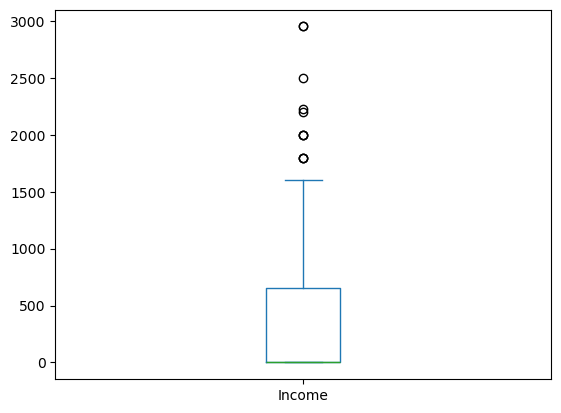

In [141]:
train_copy[train_copy['Tax_Status'] == 'Married Filling Jointly one over 65 & one under 65 (MFJ)']['Income'].plot(kind = 'box')

저 이상치가 Tax_Status에서만 이상치이고 다른 피쳐에서는 정상치라면, 그걸 확인할 순 있겠지만... 음... 그냥 지우는걸로 하자.

In [142]:
basic_info('Tax_Status')

['Nonfiler' 'Single' 'Married Filling Jointly both under 65 (MFJ)'
 'Head of Household (HOH)'
 'Married Filling Jointly one over 65 & one under 65 (MFJ)'
 'Married Filling Jointly both over 65 (MFJ)']
Tax_Status
Married Filling Jointly both under 65 (MFJ)                 8581
Single                                                      5546
Nonfiler                                                    3874
Head of Household (HOH)                                     1217
Married Filling Jointly both over 65 (MFJ)                   469
Married Filling Jointly one over 65 & one under 65 (MFJ)     302
Name: count, dtype: int64

 Mean: 

Tax_Status
Head of Household (HOH)                                     676.317995
Married Filling Jointly both over 65 (MFJ)                  203.144989
Married Filling Jointly both under 65 (MFJ)                 738.369188
Married Filling Jointly one over 65 & one under 65 (MFJ)    403.307947
Nonfiler                                                     60.947

Nonfiler: 0  
Married Filling Jointly both over 65 (MFJ): 1  
Married Filling Jointly one over 65 & one under 65 (MFJ): 2  
Single: 3  
Head of Household (HOH): 4  
Married Filling Jointly both under 65 (MFJ): 5  
로 하자

In [143]:
Tax_Status_list = list(train_copy['Tax_Status'].unique())

In [144]:
Tax_Status_list

['Nonfiler',
 'Single',
 'Married Filling Jointly both under 65 (MFJ)',
 'Head of Household (HOH)',
 'Married Filling Jointly one over 65 & one under 65 (MFJ)',
 'Married Filling Jointly both over 65 (MFJ)']

In [145]:
Tax_Status_diction = {'Nonfiler': 0,
                      'Single': 3,
                      'Married Filling Jointly both under 65 (MFJ)': 5,
                      'Head of Household (HOH)': 4,
                      'Married Filling Jointly one over 65 & one under 65 (MFJ)': 2,
                      'Married Filling Jointly both over 65 (MFJ)': 1}

In [146]:
many_encoder_train('Tax_Status', Tax_Status_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy[column].rep

In [147]:
train_copy['Tax_Status'].value_counts()

Tax_Status
5    8581
3    5546
0    3874
4    1217
1     469
2     302
Name: count, dtype: int64

In [148]:
categorical_features[16]

'Income_Status'

### Income_Status

In [149]:
basic_info('Income_Status')

['Unknown' 'Under Median' 'Over Median']
Income_Status
Under Median    13231
Unknown          6025
Over Median       733
Name: count, dtype: int64

 Mean: 

Income_Status
Over Median     907.739427
Under Median    534.197717
Unknown         545.187718
Name: Income, dtype: float64

 Std: 

Income_Status
Over Median     1065.925698
Under Median     655.290520
Unknown          673.895302
Name: Income, dtype: float64


Over Median의 표준편차가 크니 박스플롯을 그려보자

<Axes: >

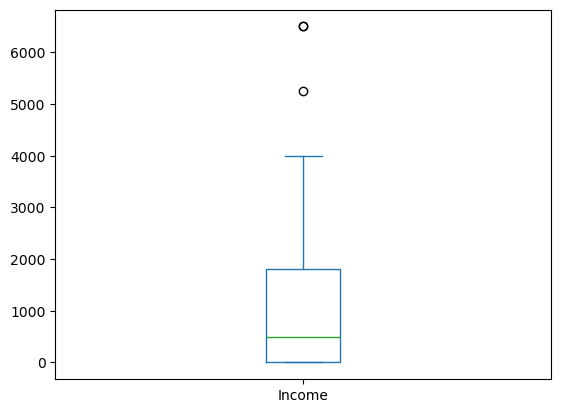

In [150]:
train_copy[train_copy['Income_Status'] == 'Over Median']['Income'].plot(kind = 'box')

In [151]:
train_copy[train_copy['Income_Status'] == 'Over Median']['Income'].sort_values()

14          0
7870        0
14807       0
7703        0
7667        0
         ... 
7493     4000
12439    4000
3673     5250
2438     6500
10685    6500
Name: Income, Length: 733, dtype: int64

이 이상치는 제거할 필요가 없어보인다. 박스가 넓고, 선이 위로 길게 뻗었기 때문이다.

Over Median을 1, 나머지를 0으로 하자

In [152]:
Income_Status_list = list(train_copy['Income_Status'].unique())

In [153]:
one_cold_encoder_train(Income_Status_list, 'Income_Status', 'Over Median')

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy[column].replace({value: 1}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_copy[column].

In [154]:
train_copy['Income_Status'].value_counts()

Income_Status
1    19256
0      733
Name: count, dtype: int64

범주형 데이터 처리를 완료했다. 히트맵을 보자.

<Axes: >

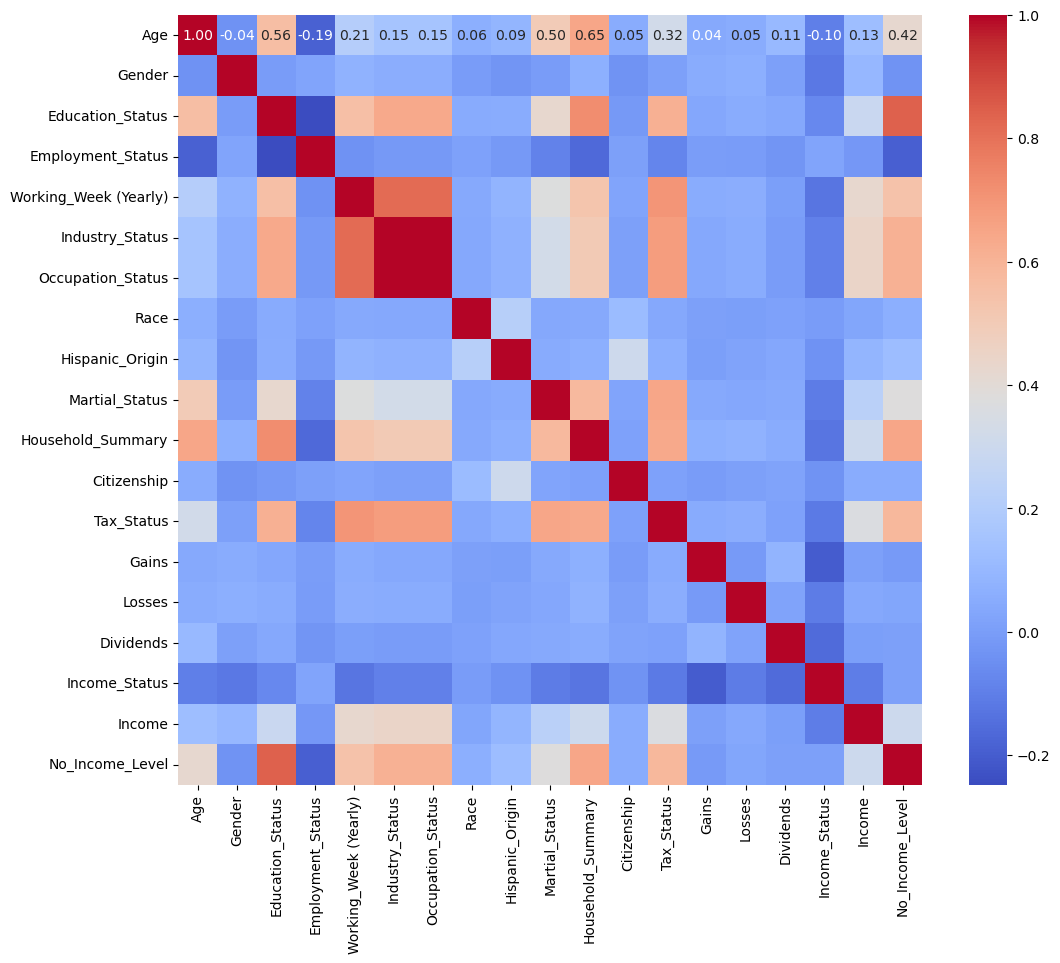

In [155]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f")

## 수치 데이터를 적절히 처리하기

수치 데이터를 dataframe 형식으로 분리해보자.

In [156]:
train_copy_numerical = train[train.describe().columns]

In [157]:
train_copy_numerical.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


In [158]:
numerical_features[0]

'Age'

### Age

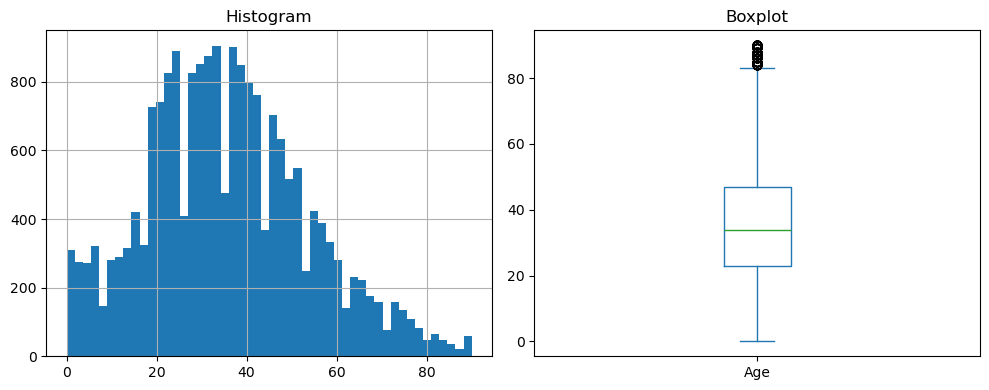

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Age'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Age'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

제거해야할 이상치는 보이지 않음, 나이의 분포가 왼쪽으로 치우쳐져 있음

In [160]:
numerical_features[1]

'Working_Week (Yearly)'

### Working_Week (Yearly)

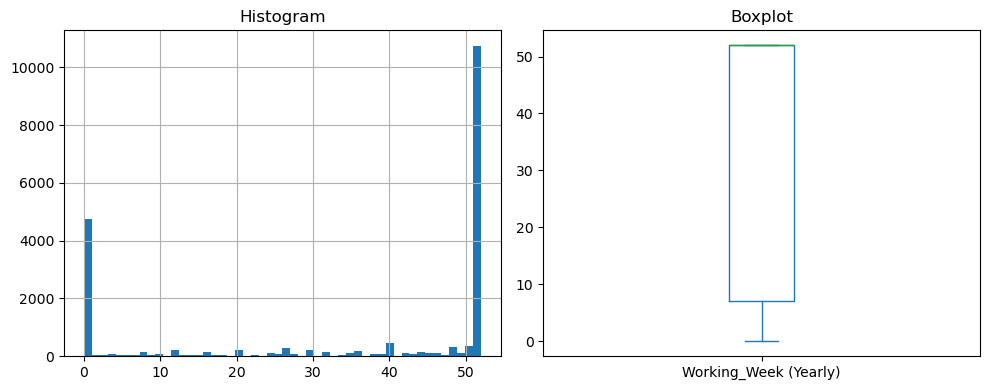

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Working_Week (Yearly)'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Working_Week (Yearly)'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

양극단에 샘플이 몰려있는 것을 볼 수 있다. 각 값 별 샘플 수를 보자.

In [162]:
train_copy_numerical['Working_Week (Yearly)'].value_counts().sort_values()

Working_Week (Yearly)
33        5
31        6
29        8
23        8
21        9
11       10
27       12
41       13
19       13
37       20
9        23
34       23
7        28
17       30
5        32
3        32
14       34
1        34
2        41
47       43
22       45
18       46
15       48
13       54
6        55
38       57
43       58
25       63
10       67
4        78
28       79
39       87
42       94
45       95
46       97
24      105
35      115
49      117
8       129
16      134
51      134
44      138
32      139
36      181
30      207
12      209
20      213
26      283
48      313
50      363
40      440
0      4720
52    10613
Name: count, dtype: int64

각 값 별 평균 소득과 표준편차를 보자

In [163]:
train_copy_numerical.groupby(['Working_Week (Yearly)'])['Income'].mean()

Working_Week (Yearly)
0      39.859534
1     215.000000
2     318.780488
3     300.625000
4     539.512821
5     434.125000
6     253.600000
7     608.928571
8     419.093023
9     578.695652
10    340.000000
11    452.900000
12    379.813397
13    461.500000
14    634.852941
15    526.979167
16    432.604478
17    382.933333
18    738.000000
19    545.000000
20    447.652582
21    911.555556
22    476.022222
23    367.500000
24    424.095238
25    620.507937
26    542.876325
27    300.000000
28    585.202532
29    534.375000
30    563.246377
31    921.333333
32    615.043165
33    514.000000
34    934.782609
35    602.400000
36    637.696133
37    909.900000
38    541.543860
39    684.091954
40    663.925000
41    635.846154
42    682.159574
43    681.517241
44    621.717391
45    736.831579
46    757.628866
47    613.651163
48    609.677316
49    638.239316
50    733.101928
51    765.276119
52    771.857156
Name: Income, dtype: float64

In [164]:
train_copy_numerical.groupby(['Working_Week (Yearly)'])['Income'].std()

Working_Week (Yearly)
0      202.782917
1      338.374009
2      400.605386
3      287.039252
4      964.744778
5      343.812566
6      328.647994
7      977.759492
8      619.625333
9      786.782252
10     347.235838
11     634.048447
12     368.703822
13     443.448100
14     522.920826
15     484.090395
16     413.610420
17     448.867766
18    1407.478976
19     262.019401
20     407.846625
21    1374.455993
22     424.201201
23     248.366089
24     370.564059
25     830.716905
26     521.685772
27     398.286101
28     997.071357
29     474.141612
30     608.225943
31     944.236340
32     576.483655
33     133.809566
34    1629.099360
35     566.914870
36     511.759298
37    1665.259642
38     698.082938
39     596.327357
40     755.350151
41     596.031018
42     591.085684
43     619.954250
44     731.434756
45    1219.484995
46     620.035841
47     542.905626
48     518.840925
49     614.119016
50     773.437979
51     772.423706
52     738.972605
Name: Income, dtype: flo

그래프로 나타내보자

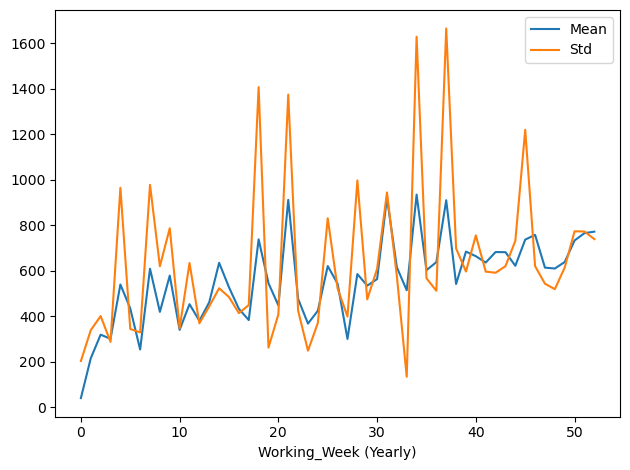

In [165]:
train_copy_numerical.groupby(['Working_Week (Yearly)'])['Income'].mean().plot(label = 'Mean')
train_copy_numerical.groupby(['Working_Week (Yearly)'])['Income'].std().plot(label = 'Std')
plt.legend()
plt.tight_layout()
plt.show()

평균과 표준편차가 같이 증감하는 경향이 있는데 이는 당연하다.  
평균이 곧은 우상향이었다면 고민하지 않고 연속 변수로서 그대로 놔뒀겠지만 떨리는 폭이 꽤나 커서 이산 변수로 처리해줘야 할지 고민이 된다. 둘 다 해보자.

#### 분기점  
1. 'Working_Week (Yearly)'을 그대로 둔다
2. 'Working_Week (Yearly)'을 이산 변수로 처리한다.

일단 1번으로 하겠다.

In [166]:
numerical_features[2]

'Gains'

### Gains

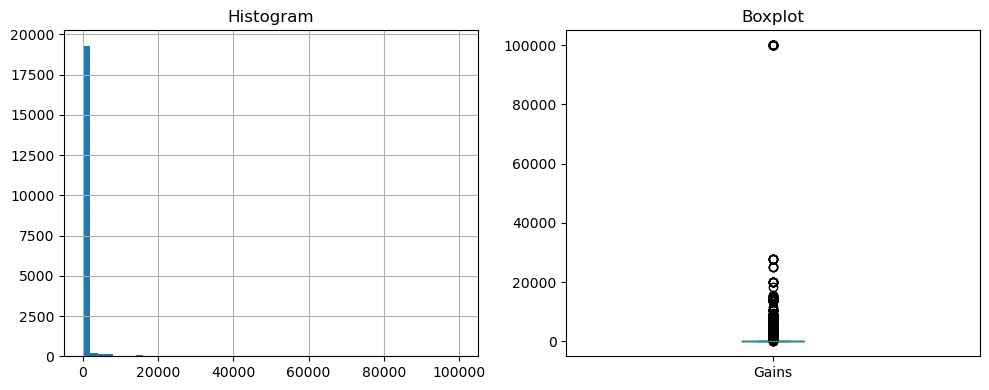

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Gains'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Gains'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

In [168]:
train_copy_numerical['Gains'].value_counts().sort_values()

Gains
2993         1
11678        1
1173         1
2227         1
6514         1
         ...  
5178        35
7688        54
15024       60
7298        73
0        19217
Name: count, Length: 106, dtype: int64

값 수별로 정렬하는 것보단 값별로 정렬하는게 낫겠다

In [169]:
train_copy_numerical['Gains'].value_counts().sort_index()

Gains
0        19217
114          4
401          2
594          7
914          5
         ...  
18481        1
20051        9
25124        3
27828        7
99999       30
Name: count, Length: 106, dtype: int64

꼬리쪽을 더 보고싶다

In [170]:
train_copy_numerical['Gains'].value_counts().sort_index().tail(20)

Gains
7443      5
7688     54
7896      4
8614     16
9386      5
9562      1
10520    12
10566     2
10605     2
11678     1
13550     8
14084     5
14344     5
15024    60
15831     1
18481     1
20051     9
25124     3
27828     7
99999    30
Name: count, dtype: int64

99999인 샘플의 평균 소득과 표준편차를 보자

In [171]:
train_copy_numerical[train_copy_numerical['Gains']==99999].groupby(['Gains'])['Income'].mean()

Gains
99999    372.7
Name: Income, dtype: float64

In [172]:
train_copy_numerical[train_copy_numerical['Gains']==99999].groupby(['Gains'])['Income'].std()

Gains
99999    680.250266
Name: Income, dtype: float64

Gains
99999    Axes(0.125,0.11;0.775x0.77)
Name: Income, dtype: object

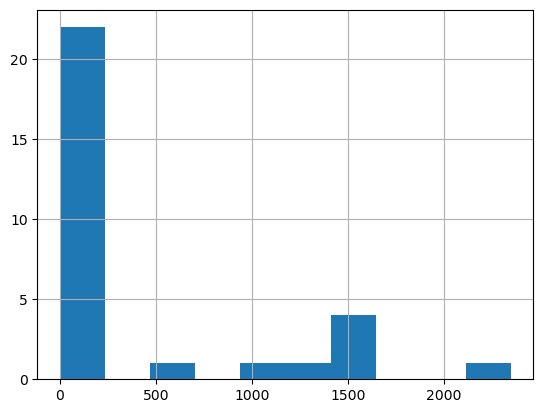

In [173]:
train_copy_numerical[train_copy_numerical['Gains']==99999].groupby(['Gains'])['Income'].hist()

Gains가 99999여도 소득이 0인 사람이 절반이 넘는다. Gains는 도대체 무슨 피쳐일까..  
Gains가 0인 사람들(대다수)의 평균 소득과 표준편차를 보자

In [174]:
train_copy_numerical[train_copy_numerical['Gains']==0].groupby(['Gains'])['Income'].mean()

Gains
0    546.161784
Name: Income, dtype: float64

In [175]:
train_copy_numerical[train_copy_numerical['Gains']==0].groupby(['Gains'])['Income'].std()

Gains
0    694.61658
Name: Income, dtype: float64

Gains
0    Axes(0.125,0.11;0.775x0.77)
Name: Income, dtype: object

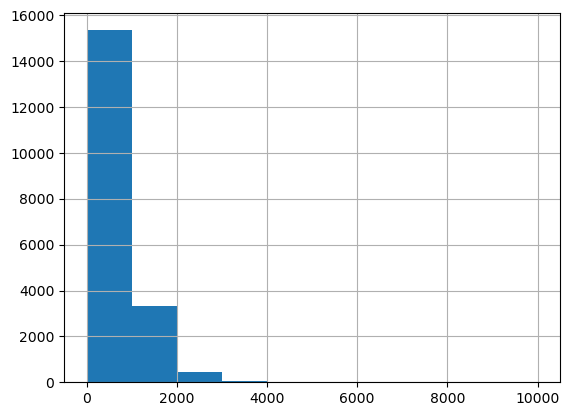

In [176]:
train_copy_numerical[train_copy_numerical['Gains']==0].groupby(['Gains'])['Income'].hist()

Gains 피쳐는 삭제해야겠다.

In [177]:
train_copy = train_copy.drop('Gains', axis=1)

In [178]:
numerical_features[3]

'Losses'

### Losses

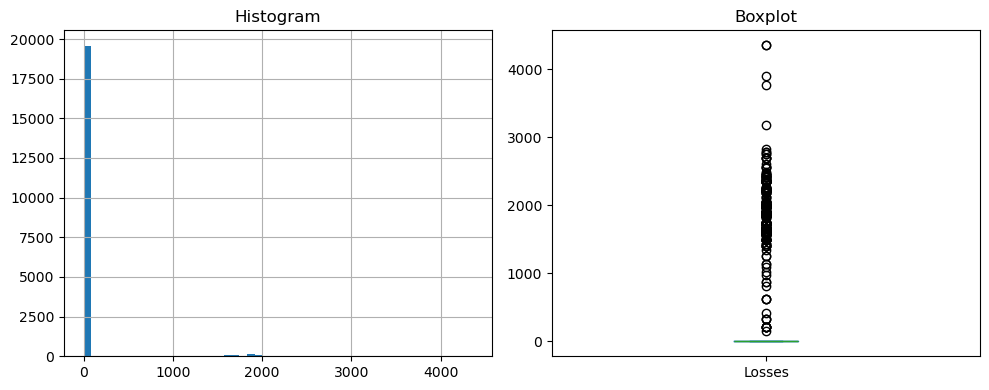

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Losses'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Losses'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

In [180]:
train_copy_numerical['Losses'].value_counts().sort_values()

Losses
3175        1
419         1
2392        1
2472        1
974         1
        ...  
1602       26
1977       35
1887       41
1902       43
0       19568
Name: count, Length: 86, dtype: int64

In [181]:
train_copy_numerical['Losses'].value_counts().sort_index()

Losses
0       19568
155         1
213         6
323         3
419         1
        ...  
2824        1
3175        1
3770        1
3900        1
4356        2
Name: count, Length: 86, dtype: int64

In [182]:
train_copy_numerical['Losses'].value_counts().sort_values().tail(20)

Losses
2205        6
1980        6
213         6
2377        6
1590        7
1719        7
1741        8
1485        8
2339        8
1740        9
1876        9
1628       10
1672       11
2001       13
1848       20
1602       26
1977       35
1887       41
1902       43
0       19568
Name: count, dtype: int64

In [183]:
train_copy_numerical['Losses'].value_counts().sort_index().tail(20)

Losses
2339    8
2352    5
2377    6
2392    1
2415    6
2444    4
2467    2
2472    1
2489    1
2547    1
2559    3
2603    1
2704    4
2754    2
2788    2
2824    1
3175    1
3770    1
3900    1
4356    2
Name: count, dtype: int64

<Axes: xlabel='Losses'>

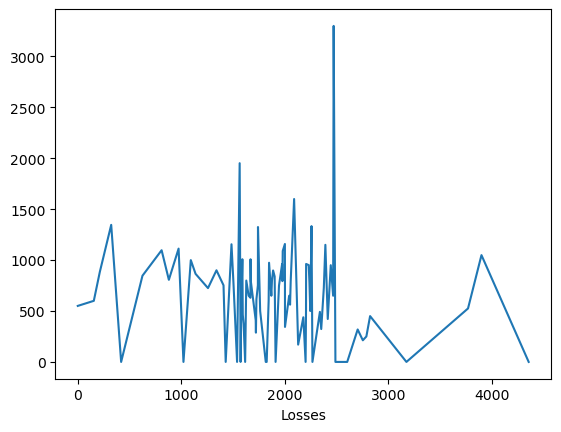

In [184]:
train_copy_numerical.groupby(['Losses'])['Income'].mean().plot()

Losses가 클수록 소득이 작아지는듯한 모습이 아주 약하게 보인다. 그냥 Losses 피쳐는 삭제하자.

In [185]:
train_copy = train_copy.drop('Losses', axis=1)

In [186]:
numerical_features[4]

'Dividends'

### Dividends

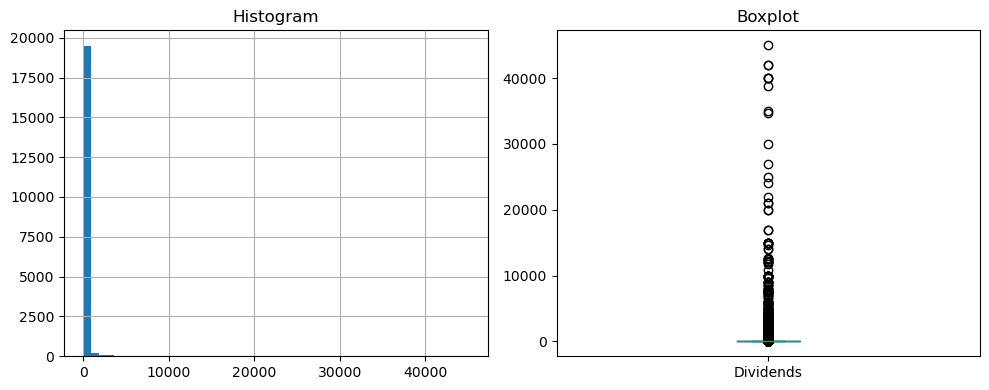

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Dividends'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Dividends'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

In [188]:
train_copy_numerical['Dividends'].value_counts().sort_values()

Dividends
285         1
303         1
113         1
870         1
215         1
        ...  
50         86
500        86
1000       86
100       134
0       17928
Name: count, Length: 420, dtype: int64

In [189]:
train_copy_numerical['Dividends'].value_counts().sort_index()

Dividends
0        17928
1           61
2           20
3           20
4            8
         ...  
35000        1
38758        1
40000        3
42000        2
45000        1
Name: count, Length: 420, dtype: int64

In [190]:
train_copy_numerical['Dividends'].value_counts().sort_index().tail(20)

Dividends
12500    4
12729    1
14000    2
14690    1
14893    1
15000    5
17000    2
20000    2
21000    2
22000    1
24000    1
25000    1
27000    1
30000    1
34738    1
35000    1
38758    1
40000    3
42000    2
45000    1
Name: count, dtype: int64

<Axes: xlabel='Dividends'>

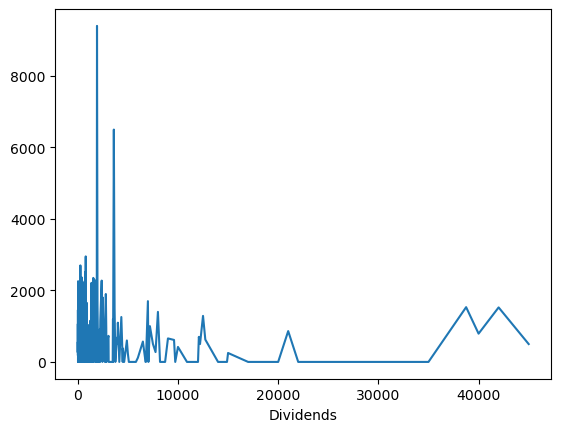

In [191]:
train_copy_numerical.groupby(['Dividends'])['Income'].mean().plot()

Dividends 약 35000 이상에서는 소득이 높은 편인 구역이 생성되어 있고, 그 외엔 난잡하다. 34738 이상을 1, 아닌 사람을 0으로 편집하자

In [192]:
train_copy_numerical[train_copy_numerical['Dividends'] == 34738]

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
15182,42,42,0,0,34738,0


In [193]:
train_copy_numerical[train_copy_numerical['Dividends'] == 35000]

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
2697,80,0,7896,0,35000,0


In [194]:
train_copy_numerical[train_copy_numerical['Dividends'] == 38758]

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
5475,42,52,0,0,38758,1532


In [195]:
train_copy_numerical[train_copy_numerical['Dividends'] == 40000]

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
3355,54,52,0,0,40000,0
7214,49,52,0,0,40000,0
19987,45,52,0,0,40000,2373


In [196]:
train_copy_numerical[train_copy_numerical['Dividends'] == 42000]

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
3046,66,52,20051,0,42000,850
11617,77,52,20051,0,42000,2200


In [197]:
train_copy_numerical[train_copy_numerical['Dividends'] == 45000]

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
401,74,48,0,0,45000,500


1로 바꿀 사람들의 인덱스는 19987, 15182, 11617, 7214, 5475, 3355, 3046, 2697, 401이다.

In [198]:
Dividend_1_list = [19987, 15182, 11617, 7214, 5475, 3355, 3046, 2697, 401]

여기서 일단 모두의 Dividends피처를 0으로 바꾸고

In [199]:
train_copy['Dividends'] = 0

In [200]:
for ind in Dividend_1_list:
    train_copy['Dividends'][ind] = 1

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3597150710.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_copy['Dividends'][ind] = 1
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3597150710.py:2: FutureWarning: ChainedAssign

In [201]:
train_copy['Dividends'][19987]

1

In [202]:
numerical_features[5]

'Income'

### Income

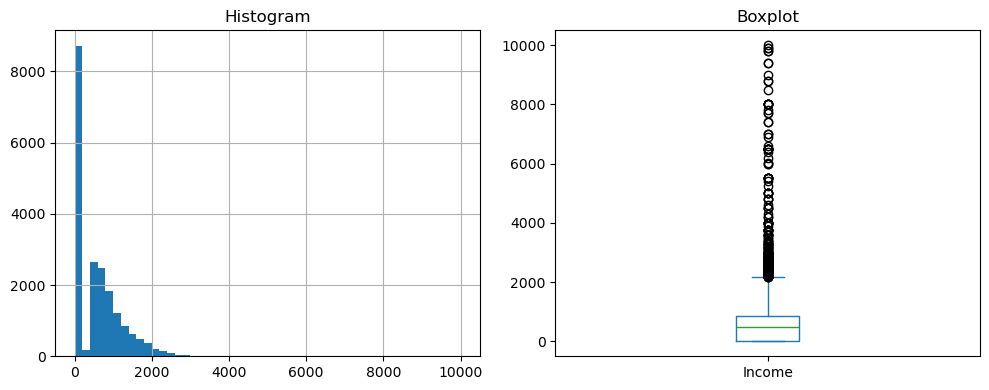

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_copy_numerical['Income'].hist(bins =  50,ax=axes[0])
axes[0].set_title('Histogram')

train_copy_numerical['Income'].plot(kind = 'box',ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

이상치가 다수 있지만 제거할 필요는 없겠다. 다만 좌측으로 치우쳐져 있으므로 로그를 씌워주겠다.

In [204]:
train_copy['Income']

0         425
1           0
2         860
3         850
4         570
         ... 
19995    1300
19996     850
19997     999
19998       0
19999     671
Name: Income, Length: 19989, dtype: int64

In [205]:
np.log(train_copy['Income']+1)

0        6.054439
1        0.000000
2        6.758095
3        6.746412
4        6.347389
           ...   
19995    7.170888
19996    6.746412
19997    6.907755
19998    0.000000
19999    6.510258
Name: Income, Length: 19989, dtype: float64

In [206]:
train_copy['Income'] = np.log(train_copy['Income']+1)

모든 데이터 전처리가 완료되었다. 히트맵을 다시 그려보자.

<Axes: >

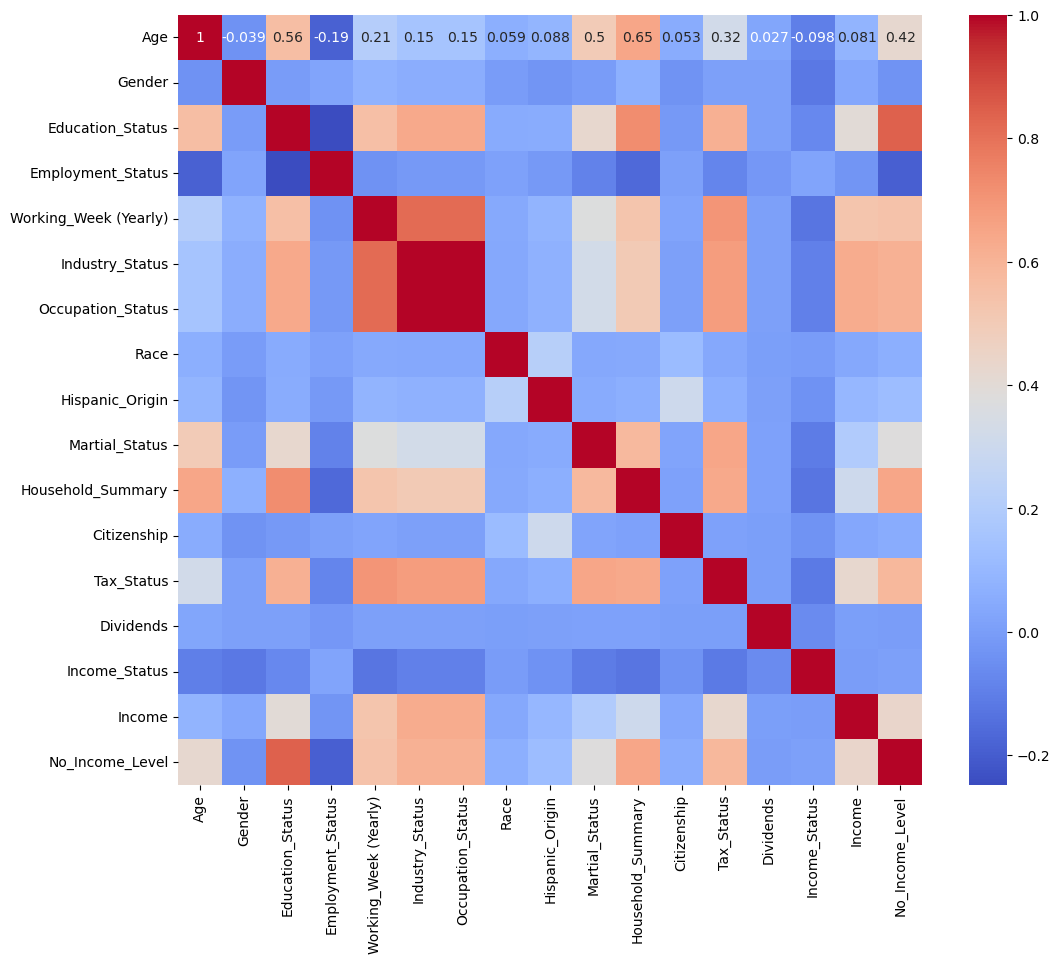

In [207]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_copy.corr(), annot=True, cmap='coolwarm')

## Test 데이터에도 같은 처리 해주기

In [208]:
test = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\test.csv')

In [209]:
test_copy = test.copy()

### ID

In [210]:
test_copy = test_copy.drop('ID', axis=1)

### Gender

In [211]:
test_copy['Gender'].replace({'M':1,'F':0}, inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\921572596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy['Gender'].replace({'M':1,'F':0}, inplace=True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\921572596.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy['Gender']

### Education_Status

In [212]:
test_copy['No_Income_Level'] = test_copy['Education_Status']

In [213]:
test_copy['No_Income_Level'].replace({'Children': 0, 
                                       'Doctorate degree': 1, 
                                       'Professional degree': 1, 
                                       'Kindergarten' : 1, 
                                       'Masters degree': 2, 
                                       'Middle (7-8)': 2, 
                                       'Elementary (1-4)': 2, 
                                       'Elementary (5-6)': 2, 
                                       'High Freshman' : 2, 
                                       'Bachelors degree': 3, 
                                       'High Sophomore': 3, 
                                       'High Senior': 3, 
                                       'Associates degree (Academic)': 4, 
                                       'High Junior': 4, 
                                       'High graduate': 4, 
                                       'College': 4, 
                                       'Associates degree (Vocational)' : 4}, 
                                      inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3361228416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy['No_Income_Level'].replace({'Children': 0,
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\3361228416.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy['No_Income_

In [214]:
test_copy['Education_Status'].replace({'Children': 0, 
                                       'Doctorate degree': 1, 
                                       'Professional degree': 1, 
                                       'Kindergarten' : 1, 
                                       'Masters degree': 1, 
                                       'Middle (7-8)': 1, 
                                       'Elementary (1-4)': 1, 
                                       'Elementary (5-6)': 1, 
                                       'High Freshman' : 1, 
                                       'Bachelors degree': 1, 
                                       'High Sophomore': 1, 
                                       'High Senior': 1, 
                                       'Associates degree (Academic)': 1, 
                                       'High Junior': 1, 
                                       'High graduate': 1, 
                                       'College': 1, 
                                       'Associates degree (Vocational)' : 1}, 
                                       inplace = True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1135689252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy['Education_Status'].replace({'Children': 0,
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1135689252.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy['Education

### Employment_Status

In [215]:
test_copy['Employment_Status'].replace({'Full-Time': 1, 
                                         'Children or Armed Forces': 3, 
                                         'Not Working': 0, 
                                         'Seeking Full-Time': 4, 
                                         'Choice Part-Time': 4, 
                                         'Part-Time (Usually Part-Time)': 4, 
                                         'Part-Time (Usually Full-Time)': 4, 
                                         'Seeking Part-Time': 2}, 
                                         inplace = True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\149233060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy['Employment_Status'].replace({'Full-Time': 1,
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\149233060.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy['Employmen

### Industry_Status

In [216]:
Industry_list_test = list(test_copy['Industry_Status'].unique())

In [217]:
for industry in Industry_list_test:
    if industry == 'Not in universe or children':
        test_copy['Industry_Status'].replace({industry: 0}, inplace = True)
    else:
        test_copy['Industry_Status'].replace({industry: 1}, inplace = True)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1829369998.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy['Industry_Status'].replace({industry: 0}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1829369998.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_c

### Occupation_Status

In [218]:
Occupation_list_test = list(test_copy['Occupation_Status'].unique())

In [219]:
one_cold_encoder_test(Occupation_list_test, 'Occupation_Status', 'Unknown')

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy[column].replace({value: 0}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy[column].

### Race

In [220]:
Race_list_test = list(test_copy['Race'].unique())

In [221]:
one_cold_encoder_test(Race_list_test, 'Race', 'Other')

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy[column].replace({value: 1}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy[column].

### Hispanic_Origin

In [222]:
many_encoder_test('Hispanic_Origin', Hispanic_Origin_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy[column].rep

### Martial_Status

In [223]:
many_encoder_test('Martial_Status', Martial_Status_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy[column].rep

### Household_Status

In [224]:
test_copy = test_copy.drop('Household_Status', axis=1)

### Household_Summary

In [225]:
many_encoder_test('Household_Summary', Household_Summary_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy[column].rep

### Citizenship

In [226]:
many_encoder_test('Citizenship', Citizenship_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy[column].rep

### Birth_Country, Birth_Country (Father), Birth_Country (Mother)

In [227]:
test_copy = test_copy.drop('Birth_Country', axis=1)

In [228]:
test_copy = test_copy.drop('Birth_Country (Father)', axis=1)

In [229]:
test_copy = test_copy.drop('Birth_Country (Mother)', axis=1)

### Tax_Status

In [230]:
many_encoder_test('Tax_Status', Tax_Status_diction)

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy[column].replace({value: code}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1837788.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy[column].rep

### Income_Status

In [231]:
one_cold_encoder_test(Income_Status_list, 'Income_Status', 'Over Median')

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy[column].replace({value: 1}, inplace = True)
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\2636328355.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_copy[column].

### Age

그대로 둔다

### Working_Week (Yearly)

일단 그대로 둔다

### Gains

In [232]:
test_copy = test_copy.drop('Gains', axis=1)

### Losses

In [233]:
test_copy = test_copy.drop('Losses', axis=1)

### Dividends

In [234]:
test_copy[test_copy['Dividends'] > 34000]

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Summary,Citizenship,Tax_Status,Dividends,Income_Status,No_Income_Level
2811,75,0,1,3,0,0,0,1,2,0,5,2,3,99999,0,3
4899,30,0,1,3,50,1,1,1,2,1,4,1,5,55000,0,4
5235,50,1,1,1,52,1,1,1,2,1,5,2,5,40000,0,2
6100,80,1,1,0,0,0,0,1,2,0,5,2,3,39000,1,4


In [235]:
Dividend_1_list_test = [6100, 5235, 4899, 2811]

In [236]:
test_copy['Dividends'] = 0

In [237]:
for ind in Dividend_1_list_test:
    test_copy['Dividends'][ind] = 1

C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1387820154.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_copy['Dividends'][ind] = 1
C:\Users\82102\AppData\Local\Temp\ipykernel_20180\1387820154.py:2: FutureWarning: ChainedAssignm

# 데이터 저장

In [238]:
train_copy.to_csv("train_1.csv")

In [239]:
test_copy.to_csv("test_1.csv")